In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('spam.csv',encoding='latin-1')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4996,ham,Esplanade lor. Where else...,NaN,NaN,NaN
36,ham,"Oops, I'll let you know when my roommate's done",NaN,NaN,NaN
4584,spam,U have a Secret Admirer who is looking 2 make ...,NaN,NaN,NaN
5369,ham,Hi mom we might be back later than &lt;#&gt;,NaN,NaN,NaN
4181,spam,Urgent! Please call 0906346330. Your ABTA comp...,NaN,NaN,NaN


# #Data Cleaning

In [3]:
df.shape

(5572, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df[df['Unnamed: 2'].isnull()==False].sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4601,ham,\Hey j! r u feeling any better,hopeSo hunny. i amnow feelin ill & ithink i m...,NaN,NaN
671,spam,SMS. ac sun0819 posts HELLO:\You seem cool,"wanted to say hi. HI!!!\"" Stop? Send STOP to ...",NaN,NaN
4859,ham,"\Response\"" is one of d powerful weapon 2 occu...","always give response 2 who cares 4 U\""... Gud...",NaN,NaN
1038,ham,"Edison has rightly said, \A fool can ask more ...",GN,GE,"GNT:-)"""
4224,ham,\The world suffers a lot... Not because of the...,"Gud night....""",NaN,NaN


In [6]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis='columns',inplace=True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
df=df.rename(columns={'v1':'target','v2':'message'})
df.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.isnull().sum()

target     0
message    0
dtype: int64

In [9]:
df.duplicated().sum()

403

In [10]:
df=df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['target']=le.fit_transform(df['target'])
df.sample(5)

,target,message
4361,0,"I can't right this second, gotta hit people up..."
4281,0,U can call now...
2767,0,Wow v v impressed. Have funs shopping!
4288,0,"Okay, good, no problem, and thanx!"
168,0,Great escape. I fancy the bridge but needs her...


# 2.EDA

In [12]:
df.groupby('target').describe()

message                                                               
         count unique                                                top freq
target                                                                       
0         4516   4516  Go until jurong point, crazy.. Available only ...    1
1          653    653  Free entry in 2 a wkly comp to win FA Cup fina...    1

In [13]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

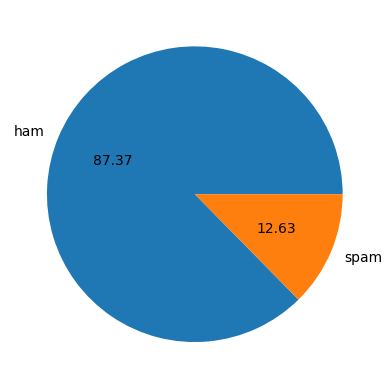

In [14]:
plt.pie(df['target'].value_counts(),labels=["ham","spam"],autopct="%.2f")
plt.show()

In [15]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rishi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
df['message'].apply(lambda x:len(x))

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: message, Length: 5169, dtype: int64

In [17]:
df['char_count']=df['message'].apply(lambda x:len(x))
df.head()

,target,message,char_count
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [18]:
df['message'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: message, Length: 5169, dtype: object

In [19]:
df['word_count']=df['message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [20]:
df['message'].apply(lambda x: nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: message, Length: 5169, dtype: object

In [21]:
df['sent_count']=df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head(5)

,target,message,char_count,word_count,sent_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [22]:
df[['char_count','word_count','sent_count']].describe()

,char_count,word_count,sent_count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [23]:
#ham

df[df.target==0][['char_count','word_count','sent_count']].describe()

,char_count,word_count,sent_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
#spam
df[df.target==1][['char_count','word_count','sent_count']].describe()

,char_count,word_count,sent_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [25]:
import seaborn as sns


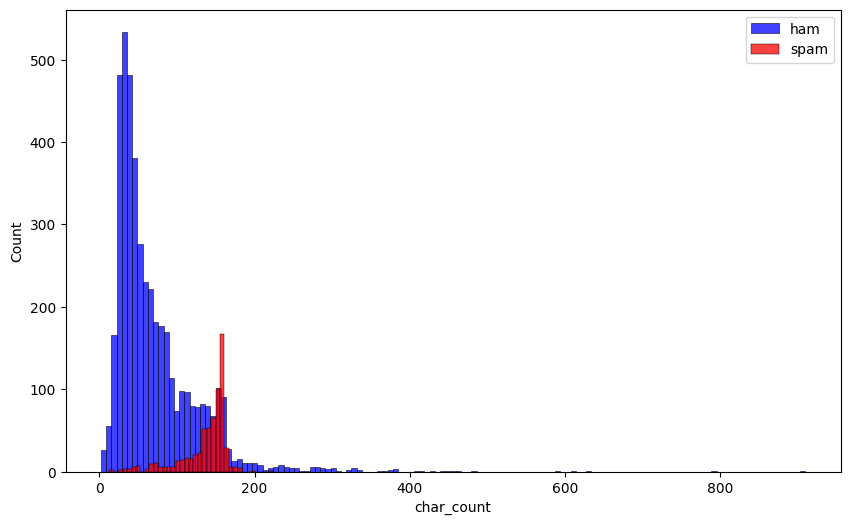

In [26]:
plt.figure(figsize=(10,6))
sns.histplot(df[df.target==0]['char_count'],color='blue',label='ham')
sns.histplot(df[df.target==1]['char_count'],color='red',label='spam')
plt.legend()

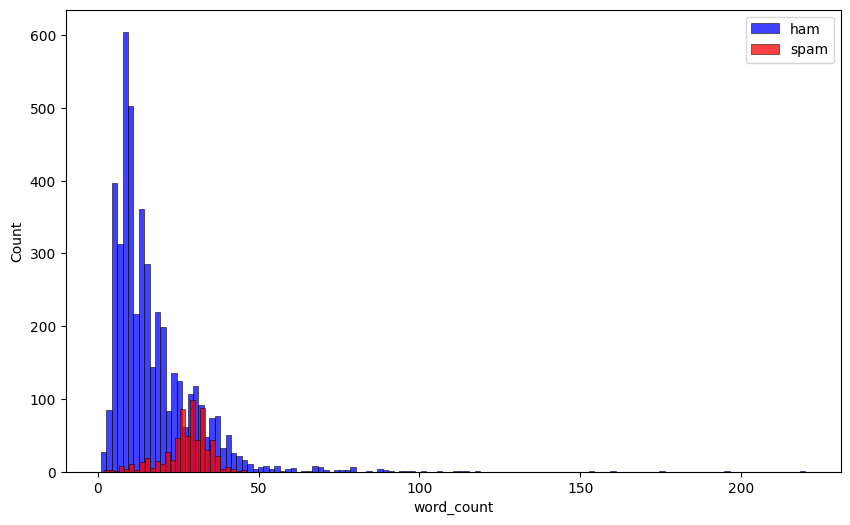

In [27]:
plt.figure(figsize=(10,6))
sns.histplot(df[df.target==0]['word_count'],color='blue',label='ham')
sns.histplot(df[df.target==1]['word_count'],color='red',label='spam')
plt.legend()

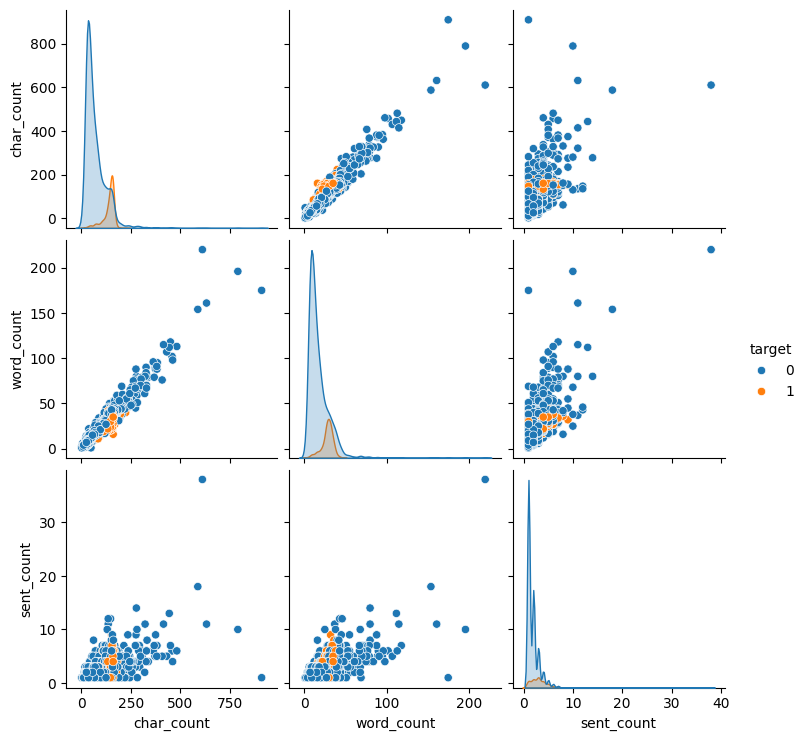

In [28]:
sns.pairplot(df,hue='target')

<Axes: >

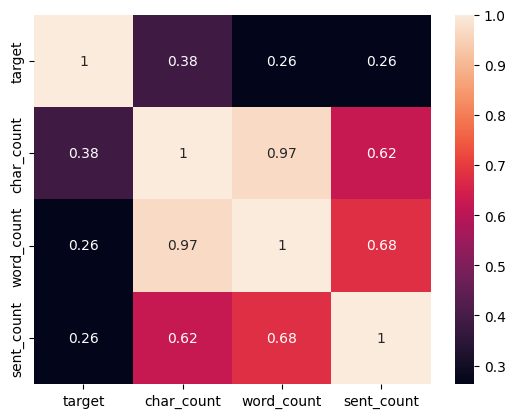

In [29]:
sns.heatmap(df[['target','char_count','word_count','sent_count']].corr(),annot=True)


# Data/Text Preprocessing
1. lower case
2. Tokenization
3. Removing special character
4. Removing stop word and punctuation
5. Stemming

In [30]:
from nltk.corpus import stopwords
stopwords=stopwords.words('english')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [31]:
import string
punc=string.punctuation
punc

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [32]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [33]:
def transform_text(text):
    #lower case
    text=text.lower()
    
    #tokenize
    text=nltk.word_tokenize(text)
    
    #removing special character
    x=[]
   
    for i in text:
        if i.isalnum():
            x.append(i)
    text=x.copy()
    x.clear()
    for i in text:
        if i not in stopwords and i not in punc:
            x.append(i)
    
    #steming
    text=x.copy()
    x.clear()
    
    for i in text:
        x.append(ps.stem(i))
    
 
    
    return " ".join(x)


In [35]:
text="Hello you danced good, but have you seen my dance?"
transform_text(text)

'hello danc good seen danc'

In [36]:
df['transformed_message']=df['message'].apply(transform_text)
df.head()

,target,message,char_count,word_count,sent_count,transformed_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [37]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [38]:
spam_wc=wc.generate(df[df['target']==1]['transformed_message'].str.cat(sep=" "))

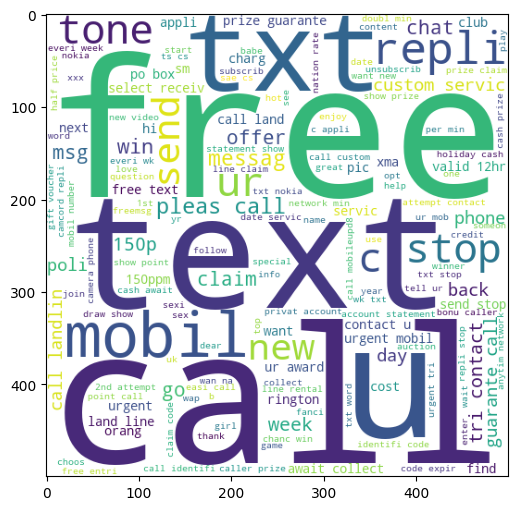

In [39]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [40]:
ham_wc=wc.generate(df[df['target']==0]['transformed_message'].str.cat(sep=" "))


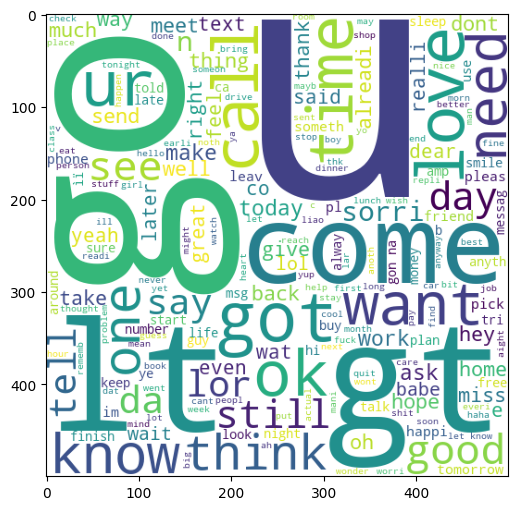

In [41]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

# Model Building


In [42]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.feature_extraction.text import TfidfVectorizer
mnb=MultinomialNB()
tfidf=TfidfVectorizer(max_features=3000)


In [43]:
y=df.target

In [44]:
from sklearn.metrics import precision_score,accuracy_score
def get_score(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    precision=precision_score(y_test,y_pred)
    accuracy=accuracy_score(y_test,y_pred)
    return precision,accuracy

In [49]:
X_tfidf=tfidf.fit_transform(df['transformed_message']).toarray()

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_tfidf,y,test_size=0.2,random_state=2)

In [51]:
get_score(mnb,X_train,X_test,y_train,y_test)

(1.0, 0.9709864603481625)

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
logi=LogisticRegression()
decision_tree=DecisionTreeClassifier()
svm=SVC()
rf=RandomForestClassifier()

In [53]:
clc={
    'logi':logi,
    'SVM':svm,
    'decision_tree':decision_tree,
    'random forest':rf,
    'NB':mnb
}

In [54]:
names=[]
preci_score=[]
accur_score=[]
for name,model in clc.items():
    names.append(name)
    preci,accu=get_score(model,X_train,X_test,y_train,y_test)
    preci_score.append(preci)
    accur_score.append(accu)
        

In [55]:
df_optimize=pd.DataFrame({'name':names,'precision_max_ft 3000':preci_score,'accuracy_max_ft 3000':accur_score}).sort_values('precision_max_ft 3000',ascending=False)
df_optimize

,name,precision_max_ft 3000,accuracy_max_ft 3000
4,NB,1.000000,0.970986
1,SVM,0.982456,0.972921
3,random forest,0.982301,0.971954
0,logi,0.979381,0.956480
2,decision_tree,0.801527,0.942940


In [57]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))